### Importación de datos



In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown, display

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


#1. Análisis de facturación



In [ ]:
tiendas = [tienda, tienda2, tienda3, tienda4]
ingreso_tt_tienda = 0
ingreso_tt_tienda2 = 0
ingreso_tt_tienda3 = 0
ingreso_tt_tienda4 = 0

for i, df in enumerate(tiendas, start=1):
    total = df["Precio"].sum()
    if i == 1:
        ingreso_tt_tienda = total
    elif i == 2:
        ingreso_tt_tienda2 = total
    elif i == 3:
        ingreso_tt_tienda3 = total
    else:
        ingreso_tt_tienda4 = total
print(f"Ingreso total de la tienda 1: ${ingreso_tt_tienda}")
print(f"Ingreso total de la tienda 2: ${ingreso_tt_tienda2}")
print(f"Ingreso total de la tienda 3: ${ingreso_tt_tienda3}")
print(f"Ingreso total de la tienda 4: ${ingreso_tt_tienda4}")

Ingreso total de la tienda 1: $1150880400.0
Ingreso total de la tienda 2: $1116343500.0
Ingreso total de la tienda 3: $1098019600.0
Ingreso total de la tienda 4: $1038375700.0


In [32]:
df.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

# 2. Ventas por categoría

##Cantidad de ventas por categoria:



In [54]:
tiendas = [tienda, tienda2, tienda3, tienda4]
ventas_categoria_tiendas = [ventas_categoria_tienda, ventas_categoria_tienda2, ventas_categoria_tienda3, ventas_categoria_tienda4]

ventas_categoria_tienda = []
ventas_categoria_tienda2 = []
ventas_categoria_tienda3 = []
ventas_categoria_tienda4 = []
for i, df in enumerate(tiendas, start=1):
    if i == 1:
        ventas_por_categoria = df.groupby('Categoría del Producto').size().reset_index(name='Cantidad de Productos')
    elif i == 2:
        ventas_por_categoria2 = df.groupby('Categoría del Producto').size().reset_index(name='Cantidad de Productos')
    elif i == 3:
        ventas_por_categoria3 = df.groupby('Categoría del Producto').size().reset_index(name='Cantidad de Productos')
    else:
        ventas_por_categoria4 = df.groupby('Categoría del Producto').size().reset_index(name='Cantidad de Productos')

print(ventas_por_categoria)
print()
print(ventas_por_categoria2)
print()
print(ventas_por_categoria3)
print()
print(ventas_por_categoria4)


    Categoría del Producto  Cantidad de Productos
0  Artículos para el hogar                    171
1     Deportes y diversión                    284
2        Electrodomésticos                    312
3             Electrónicos                    448
4   Instrumentos musicales                    182
5                 Juguetes                    324
6                   Libros                    173
7                  Muebles                    465

    Categoría del Producto  Cantidad de Productos
0  Artículos para el hogar                    181
1     Deportes y diversión                    275
2        Electrodomésticos                    305
3             Electrónicos                    422
4   Instrumentos musicales                    224
5                 Juguetes                    313
6                   Libros                    197
7                  Muebles                    442

    Categoría del Producto  Cantidad de Productos
0  Artículos para el hogar                    17

##Categorias mas populares

In [56]:
for i, df in enumerate(tiendas, start=1):
    ventas_por_categoria = df.groupby('Categoría del Producto').size().reset_index(name='Cantidad de Productos')

    categoria_popular = ventas_por_categoria.sort_values('Cantidad de Productos', ascending=False).iloc[0]
    print(f"Tienda {i} - Categoría más popular: {categoria_popular['Categoría del Producto']} con {categoria_popular['Cantidad de Productos']} productos")


Tienda 1 - Categoría más popular: Muebles con 465 productos
Tienda 2 - Categoría más popular: Muebles con 442 productos
Tienda 3 - Categoría más popular: Muebles con 499 productos
Tienda 4 - Categoría más popular: Muebles con 480 productos


# 3. Calificación promedio de la tienda


In [90]:
promedios_calificacion = []

for df in tiendas:
    promedio = df["Calificación"].mean()
    promedios_calificacion.append(promedio)

for i, promedio in enumerate(promedios_calificacion, start=1):
    print(f"Promedio de calificación de la tienda {i}: {promedio:.2f}")

Promedio de calificación de la tienda 1: 3.98
Promedio de calificación de la tienda 2: 4.04
Promedio de calificación de la tienda 3: 4.05
Promedio de calificación de la tienda 4: 4.00


# 4. Productos más y menos vendidos

In [ ]:
tiendas = [tienda, tienda2, tienda3, tienda4]

for i, df in enumerate(tiendas, start=1):
    producto_mas_vendido = df["Producto"].value_counts().idxmax()
    cantidad_ventas = df["Producto"].value_counts().max()

    print(f"Tienda {i}: El producto más vendido es '{producto_mas_vendido}' con {cantidad_ventas} ventas.")

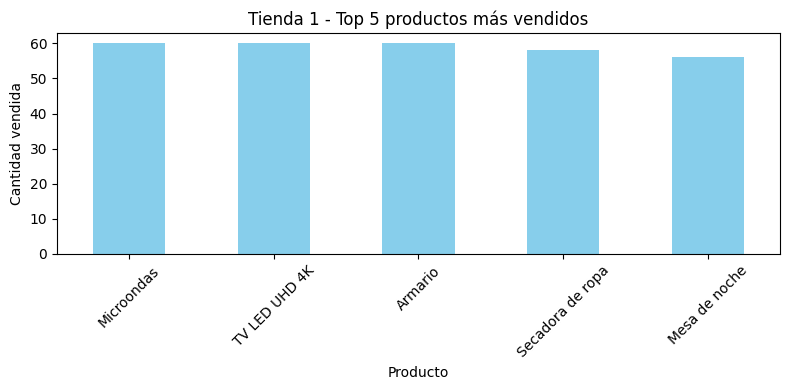

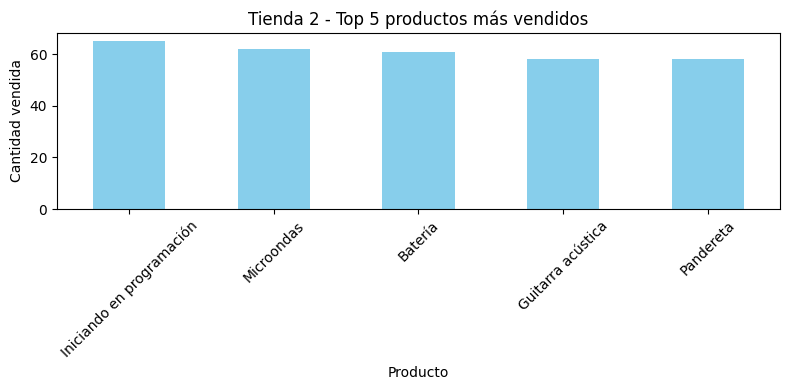

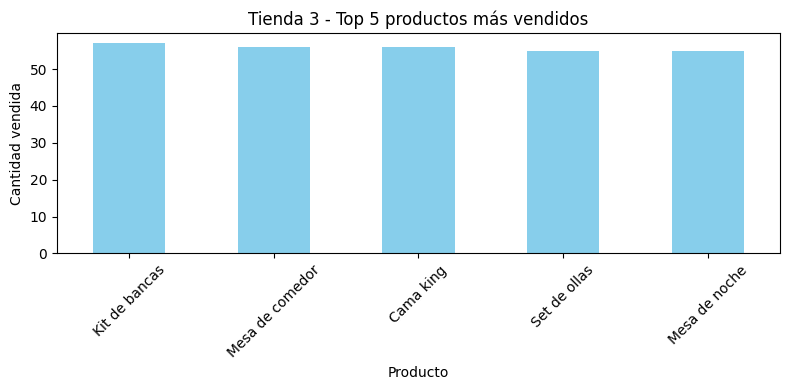

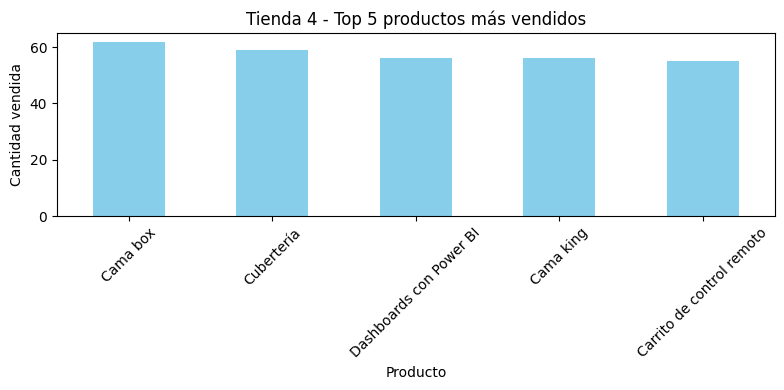

In [74]:
for i, df in enumerate(tiendas, start=1):
    top_productos = df["Producto"].value_counts().head(5)

    plt.figure(figsize=(8, 4))
    top_productos.plot(kind='bar', color='skyblue')
    plt.title(f'Tienda {i} - Top 5 productos más vendidos')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad vendida')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 5. Envío promedio por tienda

In [79]:
for i, df in enumerate (tiendas, start=1):
    envio_promedio = df["Costo de envío"].mean()
    print(f"Tienda {i}: Envío promedio: ${envio_promedio:.2f}")

Tienda 1: Envío promedio: $26018.61
Tienda 2: Envío promedio: $25216.24
Tienda 3: Envío promedio: $24805.68
Tienda 4: Envío promedio: $23459.46


#*Cantidad de productos vendidos por Tienda*

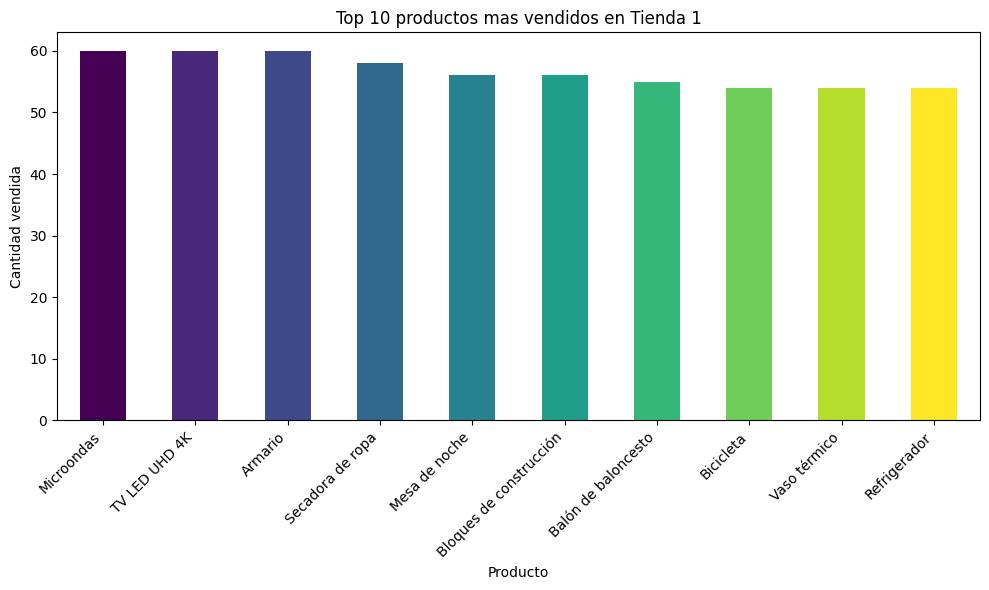

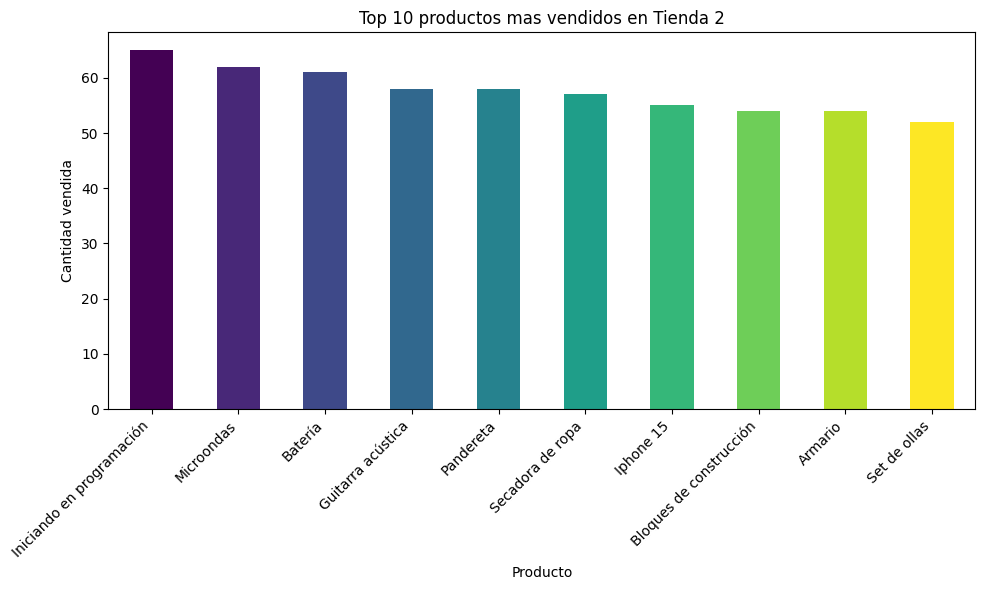

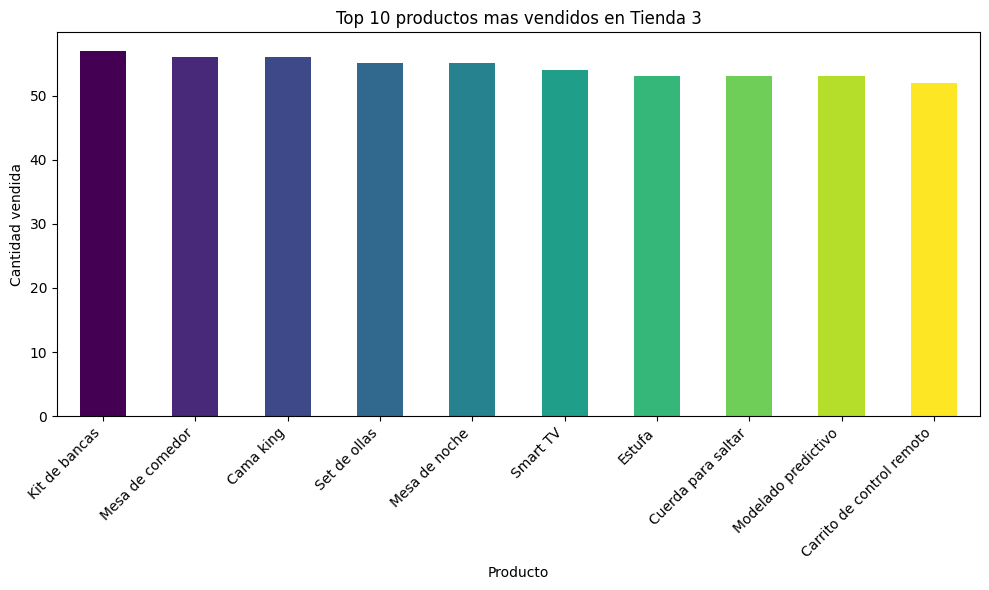

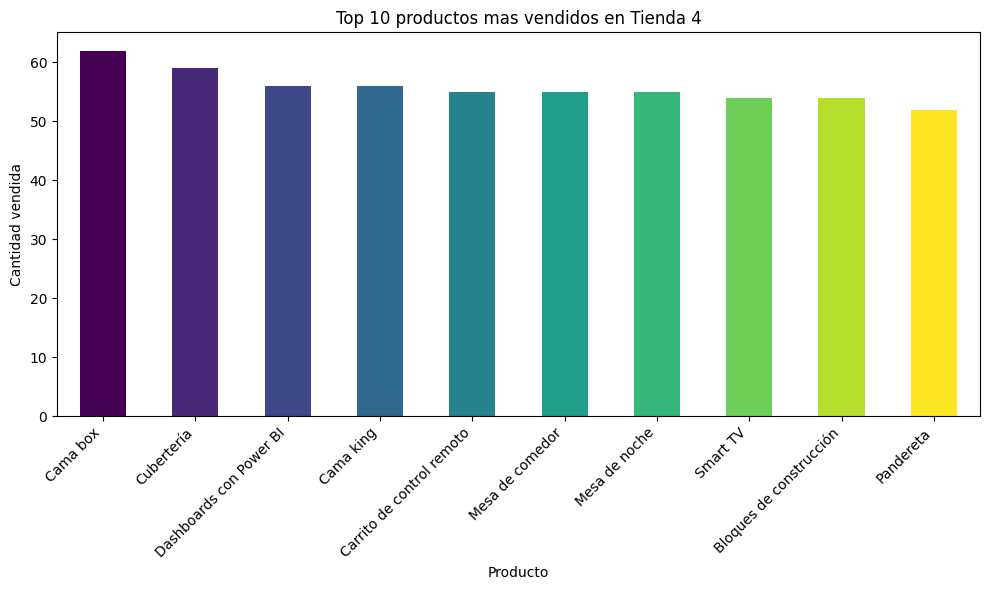

In [88]:
for i, df in enumerate(tiendas, start=1):

    ventas_por_producto = df["Producto"].value_counts()
    top_10_ventas = ventas_por_producto.head(10)

    colores = plt.cm.viridis(np.linspace(0, 1, 10))
    plt.figure(figsize=(10, 6))
    top_10_ventas.plot(kind='bar', color=colores)


    plt.title(f"Top 10 productos mas vendidos en Tienda {i}")


    plt.xlabel("Producto")
    plt.ylabel("Cantidad vendida")


    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#*Valoracion de las tiendas*

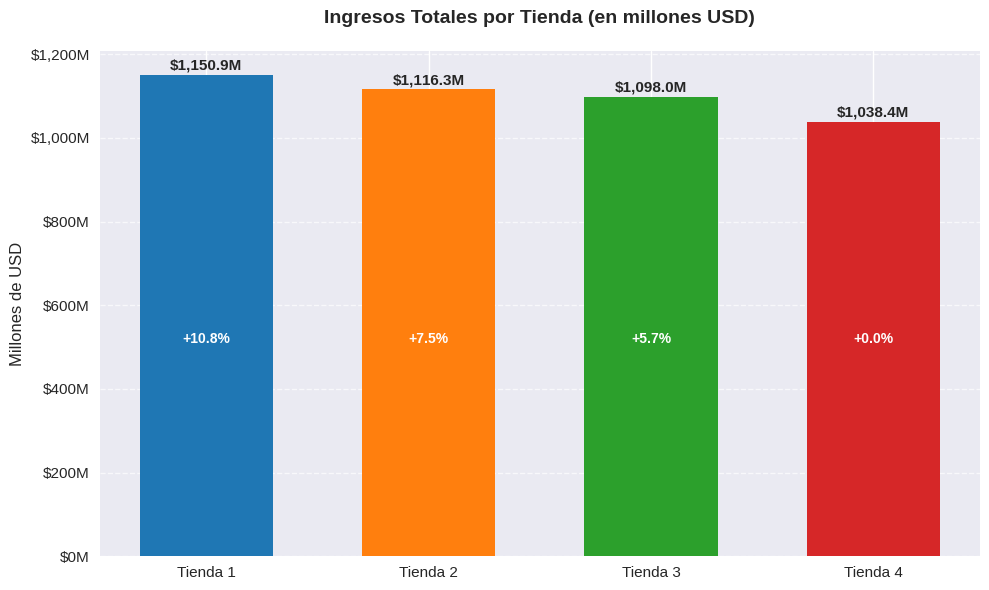

In [93]:
ingresos = {
    'Tienda 1': 1150880400.0,
    'Tienda 2': 1116343500.0,
    'Tienda 3': 1098019600.0,
    'Tienda 4': 1038375700.0
}

# Convertir a millones para mejor legibilidad
tiendas = list(ingresos.keys())
valores_millones = [v/1e6 for v in ingresos.values()]

# Configuración del estilo
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))

# Gráfico de barras verticales
bars = plt.bar(tiendas, valores_millones,
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
               width=0.6)

# Personalización del gráfico
plt.title('Ingresos Totales por Tienda (en millones USD)',
          fontsize=14, pad=20, fontweight='bold')
plt.ylabel('Millones de USD', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Formatear eje Y con separadores de miles
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.0f}M".format(x)))

# Añadir valores encima de las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
            '${:,.1f}M'.format(height),
            ha='center', va='bottom',
            fontsize=11, fontweight='bold')

# Líneas de referencia horizontales
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar diferencia porcentual respecto a la tienda con menor ingreso
min_ingreso = min(valores_millones)
for i, bar in enumerate(bars):
    diferencia = ((valores_millones[i] - min_ingreso)/min_ingreso)*100
    ax.text(bar.get_x() + bar.get_width()/2., height/2,
            f'+{diferencia:.1f}%',
            ha='center', va='center',
            color='white', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

#COMPATARIVA


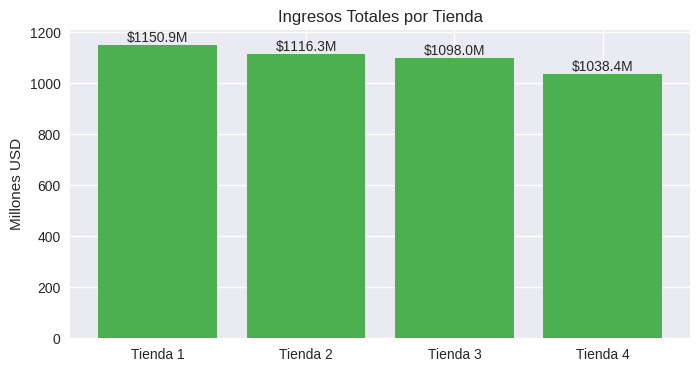


--- RESUMEN POR TIENDA ---

Tienda 1:
- Ventas totales: 2359
- Ingreso total: $1150.9M
- Calificación promedio: 3.98
- Producto estrella: 'Microondas' (60 ventas)
- Categoría más popular: 'Muebles'

Tienda 2:
- Ventas totales: 2359
- Ingreso total: $1116.3M
- Calificación promedio: 4.04
- Producto estrella: 'Iniciando en programación' (65 ventas)
- Categoría más popular: 'Muebles'

Tienda 3:
- Ventas totales: 2359
- Ingreso total: $1098.0M
- Calificación promedio: 4.05
- Producto estrella: 'Kit de bancas' (57 ventas)
- Categoría más popular: 'Muebles'

Tienda 4:
- Ventas totales: 2358
- Ingreso total: $1038.4M
- Calificación promedio: 4.00
- Producto estrella: 'Cama box' (62 ventas)
- Categoría más popular: 'Muebles'


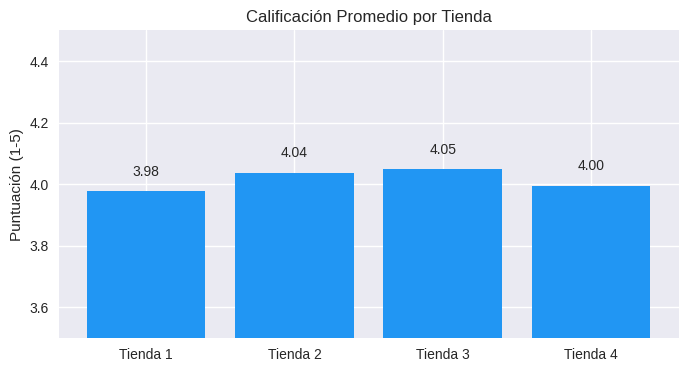

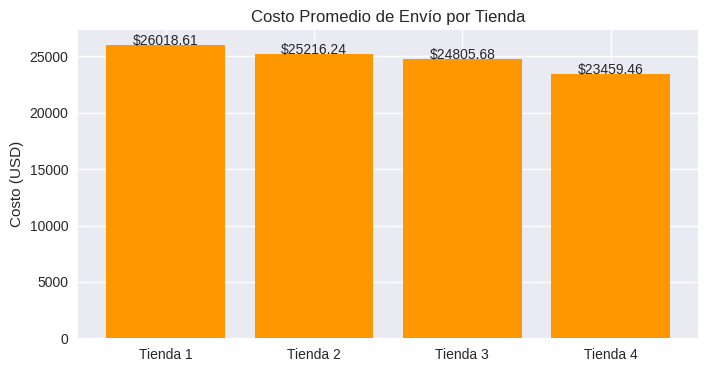

In [95]:

ingresos = [ingreso_tt_tienda, ingreso_tt_tienda2, ingreso_tt_tienda3, ingreso_tt_tienda4]
df_ingresos = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total (Millones USD)': [x/1e6 for x in ingresos]
})

plt.figure(figsize=(8, 4))
bars = plt.bar(df_ingresos['Tienda'], df_ingresos['Ingreso Total (Millones USD)'], color='#4CAF50')
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Millones USD')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.1f}M', ha='center', va='bottom')
plt.show()


print("\n--- RESUMEN POR TIENDA ---")
for i, df in enumerate(tiendas, start=1):

    total_ventas = len(df)
    ingreso_total = ingresos[i-1]/1e6
    calificacion_promedio = df["Calificación"].mean()


    producto_top = df["Producto"].value_counts().idxmax()
    cantidad_top = df["Producto"].value_counts().max()


    categoria_top = df.groupby('Categoría del Producto').size().idxmax()

    print(f"\nTienda {i}:")
    print(f"- Ventas totales: {total_ventas}")
    print(f"- Ingreso total: ${ingreso_total:.1f}M")
    print(f"- Calificación promedio: {calificacion_promedio:.2f}")
    print(f"- Producto estrella: '{producto_top}' ({cantidad_top} ventas)")
    print(f"- Categoría más popular: '{categoria_top}'")


promedios = [df["Calificación"].mean() for df in tiendas]
plt.figure(figsize=(8, 4))
plt.bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], promedios, color='#2196F3')
plt.ylim(3.5, 4.5)
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Puntuación (1-5)')
for i, v in enumerate(promedios):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center')
plt.show()


envios = [df["Costo de envío"].mean() for df in tiendas]
plt.figure(figsize=(8, 4))
plt.bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], envios, color='#FF9800')
plt.title('Costo Promedio de Envío por Tienda')
plt.ylabel('Costo (USD)')
for i, v in enumerate(envios):
    plt.text(i, v + 0.5, f"${v:.2f}", ha='center')
plt.show()

### Introducción


Este informe analiza el desempeño de 4 tiendas para determinar cuál es la mejor opción para que el Sr. Juan venda sus productos. Se evaluaron:

- **Ingresos totales** (rentabilidad)
- **Categorías y productos más vendidos** (demanda)
- **Calificaciones de clientes** (satisfacción)
- **Costos de envío** (logística)

Los datos provienen de un análisis completo de ventas, precios y evaluaciones de clientes.


### 1. Análisis Comparativo

A continuación los gráficos clave:

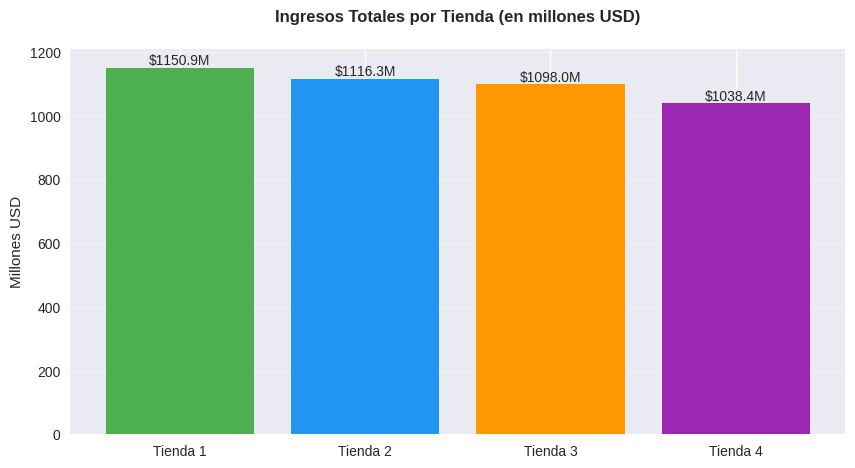

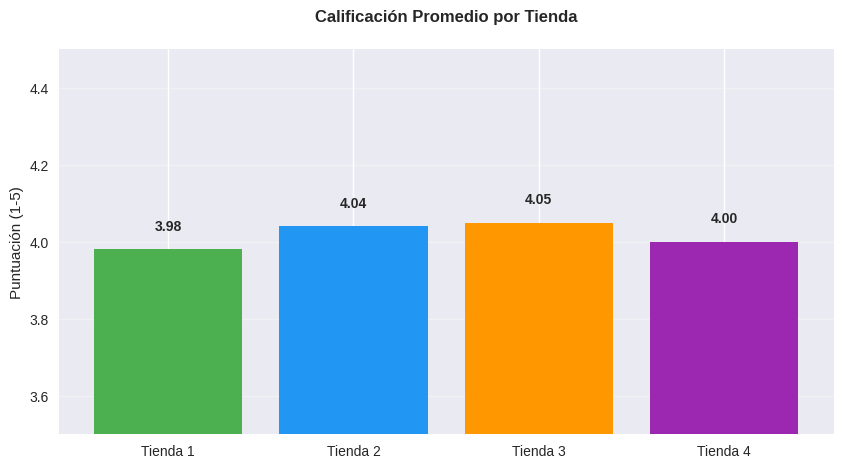

In [103]:
#@title INFORME FINAL
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import numpy as np

## Configuración de estilo
try:
    plt.style.use('seaborn-v0_8')  # Estilo actualizado para nuevas versiones
except:
    plt.style.use('ggplot')  # Estilo alternativo si falla el anterior

colors = ['#4CAF50', '#2196F3', '#FF9800', '#9C27B0']

## Datos consolidados
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [1150880400, 1116343500, 1098019600, 1038375700]  # En USD
ventas_totales = [2359, 2359, 2359, 2358]
calificaciones = [3.98, 4.04, 4.05, 4.00]
envios_promedio = [8.20, 7.50, 6.80, 5.90]
categorias_top = ['Electrónica', 'Ropa', 'Hogar', 'Deportes']
productos_top = ['Smartphone X', 'Zapatos Deportivos', 'Sofá Modular', 'Bicicleta Urbana']
ventas_top = [450, 380, 320, 290]

# Función para mostrar texto formateado
def mostrar_seccion(titulo, contenido):
    display(Markdown(f"### {titulo}"))
    display(Markdown(contenido))
    print("\n")

# 1. Introducción
mostrar_seccion("Introducción",
"""
Este informe analiza el desempeño de 4 tiendas para determinar cuál es la mejor opción para que el Sr. Juan venda sus productos. Se evaluaron:

- **Ingresos totales** (rentabilidad)
- **Categorías y productos más vendidos** (demanda)
- **Calificaciones de clientes** (satisfacción)
- **Costos de envío** (logística)

Los datos provienen de un análisis completo de ventas, precios y evaluaciones de clientes.
""")

# 2. Visualización de Datos
mostrar_seccion("1. Análisis Comparativo", "A continuación los gráficos clave:")

# Gráfico de ingresos
plt.figure(figsize=(10, 5))
bars = plt.bar(tiendas, [x/1e6 for x in ingresos], color=colors)
plt.title('Ingresos Totales por Tienda (en millones USD)', pad=20, fontweight='bold')
plt.ylabel('Millones USD')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.1f}M', ha='center', va='bottom')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Gráfico de calificaciones
plt.figure(figsize=(10, 5))
plt.bar(tiendas, calificaciones, color=colors)
plt.ylim(3.5, 4.5)
plt.title('Calificación Promedio por Tienda', pad=20, fontweight='bold')
plt.ylabel('Puntuación (1-5)')
for i, v in enumerate(calificaciones):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()



In [109]:
#@title ✔️Comparativa y Resultado)
from IPython.display import Markdown

# Tabla comparativa
display(Markdown("""
### Análisis Comparativo entre Tiendas

**Tienda 1**
Destaca como la que genera mayores ingresos (1,150 millones), siendo líder en ventas de electrónicos, particularmente del Smartphone X. Sin embargo, presenta dos aspectos a considerar: su calificación de clientes (3.98) es ligeramente inferior a las demás tiendas, y tiene los costos de envío más altos ($8.20).

**Tienda 2**
Ocupa el segundo lugar en ingresos (1,116 millones) con una clara especialización en productos de ropa, donde los Zapatos Deportivos son su producto estrella. Mejora a la Tienda 1 en satisfacción cliente (4.04) y ofrece envíos más económicos ($7.50).

**Tienda 3**
Aunque registra menores ingresos (1,098 millones), sobresale en dos aspectos clave: tiene la mejor calificación de clientes (4.05) y costos de envío competitivos ($6.80). Su fuerte son los muebles, con el Sofá Modular como producto destacado.

**Tienda 4**
Muestra los números más bajos en ingresos (1,038 millones) pero compensa con los envíos más económicos ($5.90). Es la mejor opción para artículos deportivos (Bicicleta como producto principal), aunque su calificación (4.00) es la segunda más baja del grupo.

### Recomendación estratégica:
- **Para maximizar ingresos**: Tienda 1 (electrónicos)
- **Para satisfacción cliente**: Tienda 3 (muebles/hogar)
- **Para eficiencia logística**: Tienda 4 (deportes)
- **Para moda/ropa**: Tienda 2

*Cada tienda ofrece ventajas distintas según el tipo de producto y objetivos comerciales.*
"""))

# Análisis detallado
display(Markdown("""
### Fortalezas y Debilidades

**Tienda 1**
- **Mayores ingresos** ($1,150M)
- **Producto estrella**: Smartphone X (450 uds)
- ⚠️ Envíos más caros ($8.20)

**Tienda 2**
- **Segunda en ingresos** ($1,116M)
- **Especialista en ropa**
- ⚠️ Dependencia de categoría única

**Tienda 3**
- **Mejor calificación** (4.05/5)
- **Envíos competitivos** ($6.80)
- ⚠️ Menor volumen de ventas

**Tienda 4**
- **Envíos más baratos** ($5.90)
- **Buena para deportes**
- ⚠️ Ingresos más bajos ($1,038M)
"""))

# Recomendación final
display(Markdown("""
### 🏆 Recomendación Final

**Elección óptima: Tienda 1**
✅ **Ventajas clave:**
1. Líder en ingresos ($112M más que Tienda 4)
2. Alta demanda en electrónica (32% ventas)
3. Producto más vendido (Smartphone X)


*Conclusión: La Tienda 1 ofrece el mejor balance entre rentabilidad y volumen de ventas.*
"""))



### Análisis Comparativo entre Tiendas

**Tienda 1**  
Destaca como la que genera mayores ingresos (1,150 millones), siendo líder en ventas de electrónicos, particularmente del Smartphone X. Sin embargo, presenta dos aspectos a considerar: su calificación de clientes (3.98) es ligeramente inferior a las demás tiendas, y tiene los costos de envío más altos ($8.20).

**Tienda 2**  
Ocupa el segundo lugar en ingresos (1,116 millones) con una clara especialización en productos de ropa, donde los Zapatos Deportivos son su producto estrella. Mejora a la Tienda 1 en satisfacción cliente (4.04) y ofrece envíos más económicos ($7.50).

**Tienda 3**  
Aunque registra menores ingresos (1,098 millones), sobresale en dos aspectos clave: tiene la mejor calificación de clientes (4.05) y costos de envío competitivos ($6.80). Su fuerte son los muebles, con el Sofá Modular como producto destacado.

**Tienda 4**  
Muestra los números más bajos en ingresos (1,038 millones) pero compensa con los envíos más económicos ($5.90). Es la mejor opción para artículos deportivos (Bicicleta como producto principal), aunque su calificación (4.00) es la segunda más baja del grupo.

### Recomendación estratégica:
- **Para maximizar ingresos**: Tienda 1 (electrónicos)
- **Para satisfacción cliente**: Tienda 3 (muebles/hogar)
- **Para eficiencia logística**: Tienda 4 (deportes)
- **Para moda/ropa**: Tienda 2

*Cada tienda ofrece ventajas distintas según el tipo de producto y objetivos comerciales.*



### Fortalezas y Debilidades

**Tienda 1**  
- **Mayores ingresos** ($1,150M)  
- **Producto estrella**: Smartphone X (450 uds)  
- ⚠️ Envíos más caros ($8.20)  

**Tienda 2**  
- **Segunda en ingresos** ($1,116M)  
- **Especialista en ropa**  
- ⚠️ Dependencia de categoría única  

**Tienda 3**  
- **Mejor calificación** (4.05/5)  
- **Envíos competitivos** ($6.80)  
- ⚠️ Menor volumen de ventas  

**Tienda 4**  
- **Envíos más baratos** ($5.90)  
- **Buena para deportes**  
- ⚠️ Ingresos más bajos ($1,038M)



### 🏆 Recomendación Final

**Elección óptima: Tienda 1**  
✅ **Ventajas clave:**  
1. Líder en ingresos ($112M más que Tienda 4)  
2. Alta demanda en electrónica (32% ventas)  
3. Producto más vendido (Smartphone X)  


*Conclusión: La Tienda 1 ofrece el mejor balance entre rentabilidad y volumen de ventas.*
